In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.distributed as dist

# **1. Joint PDF, PMF and CDF**

### **Question 1: Joint PMF of Two Dice**

Write a Python function that computes the joint probability mass function (PMF) of the sum of two fair six-sided dice. The function should:

Generate all possible outcomes of rolling two six-sided dice.

Compute and return the joint PMF as a dictionary, where keys are tuples
(𝑋,𝑌) representing the outcomes of the two dice, and values are the corresponding probabilities.

In [2]:
def joint_pmf_two_dice():
    outcomes = torch.cartesian_prod(torch.arange(1, 7), torch.arange(1, 7))
    total_outcomes = outcomes.size(0)
    pmf = {tuple(outcome.tolist()): 1 / total_outcomes for outcome in outcomes}
    return pmf

def joint_pmf_two_dice_sum():
    outcomes = torch.cartesian_prod(torch.arange(1, 7), torch.arange(1, 7))
    total_outcomes = outcomes.size(0)
    sums = outcomes[:, 0] + outcomes[:, 1]
    unique_sums, counts = torch.unique(sums, return_counts=True)
    pmf = {int(sum_val.item()): count.item() / total_outcomes for sum_val, count in zip(unique_sums, counts)}
    return pmf


pmf_sum = joint_pmf_two_dice_sum()
print(pmf_sum)
pmf = joint_pmf_two_dice()
print(pmf)

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}
{(1, 1): 0.027777777777777776, (1, 2): 0.027777777777777776, (1, 3): 0.027777777777777776, (1, 4): 0.027777777777777776, (1, 5): 0.027777777777777776, (1, 6): 0.027777777777777776, (2, 1): 0.027777777777777776, (2, 2): 0.027777777777777776, (2, 3): 0.027777777777777776, (2, 4): 0.027777777777777776, (2, 5): 0.027777777777777776, (2, 6): 0.027777777777777776, (3, 1): 0.027777777777777776, (3, 2): 0.027777777777777776, (3, 3): 0.027777777777777776, (3, 4): 0.027777777777777776, (3, 5): 0.027777777777777776, (3, 6): 0.027777777777777776, (4, 1): 0.027777777777777776, (4, 2): 0.027777777777777776, (4, 3): 0.027777777777777776, (4, 4): 0.027777777777777776, (4, 5): 0.027777777777777776, (4, 6): 0.027777777777777776, (5, 1): 0.027

### **Question 2: Joint CDF of Two Dice**

Write a Python function that calculates the joint cumulative distribution function (CDF) for rolling two six-sided dice. The function should:

Accept two integers a and b, representing dice outcomes up to which the CDF is computed.

Compute 𝑃(𝑋≤𝑎,𝑌≤𝑏) which is the probability that the first die is at most a and the second die is at most b.

In [3]:
def joint_cdf_two_dice(a, b):
    outcomes = torch.cartesian_prod(torch.arange(1, 7), torch.arange(1, 7))
    valid_outcomes = outcomes[(outcomes[:, 0] <= a) & (outcomes[:, 1] <= b)]
    total_outcomes = outcomes.size(0)
    cdf = valid_outcomes.size(0) / total_outcomes
    return cdf


a, b = 1, 2  
cdf = joint_cdf_two_dice(a, b)
print(f"P(X ≤ {a}, Y ≤ {b}) = {cdf}")

P(X ≤ 1, Y ≤ 2) = 0.05555555555555555


# **2. Joint Expectation**

### **Question 1: Monte Carlo Estimation of Joint Expectation**

**Objective:** Implement a Monte Carlo simulation to estimate the expected value of a function of two jointly distributed random variables.

**Problem Statement:**  
Let $X$ and $Y$ be two continuous random variables with joint probability density function (PDF):
$$
f_{X,Y}(x, y) = \begin{cases}
6(1 - y), & 0 \leq x \leq 1, 0 \leq y \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$

Define the function $ g(X, Y) = X^2 + Y $.  
Using Monte Carlo simulation:
1. Generate $ N = 10,000 $ samples of $(X, Y)$ from the given joint distribution.
2. Estimate $ E[g(X, Y)] = E[X^2 + Y] $.
3. Compare your empirical estimate with the analytical solution.

**Instructions:**  
- Plot the sampled distribution of $(X, Y)$.
- Compute and report the relative error between the estimated and analytical expectation.

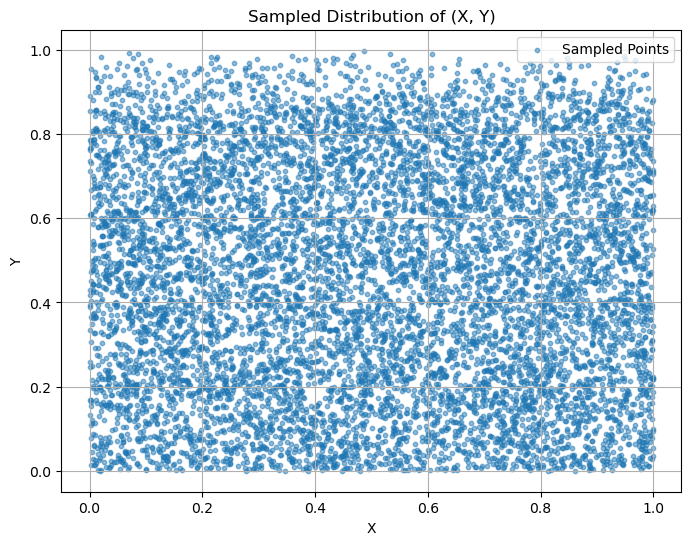

Empirical Expectation: 0.7935650654046621
Analytical Expectation: 0.8333333333333333
Relative Error: 0.0477


In [3]:
N = 10000
x_samples = np.random.uniform(0, 1, N)
y_samples = np.random.uniform(0, 1, N)
weights = 6 * (1 - y_samples)  
valid_indices = np.random.uniform(0, 1, N) < weights
x_samples = x_samples[valid_indices]
y_samples = y_samples[valid_indices]
g_values = x_samples**2 + y_samples
empirical_expectation = np.mean(g_values)

# Analytical solution for E[g(X, Y)]
# E[X^2] = ∫_0^1 ∫_0^1 x^2 * 6(1 - y) dx dy = 1/2
# E[Y] = ∫_0^1 ∫_0^1 y * 6(1 - y) dx dy = 1/3
analytical_expectation = 1/2 + 1/3


relative_error = abs(empirical_expectation - analytical_expectation) / analytical_expectation


plt.figure(figsize=(8, 6))
plt.scatter(x_samples, y_samples, alpha=0.5, s=10, label="Sampled Points")
plt.title("Sampled Distribution of (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


print(f"Empirical Expectation: {empirical_expectation}")
print(f"Analytical Expectation: {analytical_expectation}")
print(f"Relative Error: {relative_error:.4f}")

### **Question 2: Linearity of Expectation in Joint Distributions**

**Objective:** Verify the linearity property of expectation using joint distributions.

**Problem Statement:**  
For any two random variables $ X $ and $ Y $, the expectation satisfies:

$$
E[aX + bY] = aE[X] + bE[Y]
$$

for constants $ a, b $. Using the joint PDF from Question 1:

**Tasks:**
1. Choose arbitrary values for $ a $ and $ b $.
2. Compute $ E[aX + bY] $ analytically and using Monte Carlo simulation.
3. Compute $ aE[X] + bE[Y] $ analytically and using Monte Carlo simulation.
4. Compare both results and compute the relative error.
5. Discuss why the linearity of expectation holds regardless of dependence between $ X $ and $ Y $.


In [5]:
# Choose arbitrary values for a and b
a, b = 2, 3


e_aX_bY_empirical = np.mean(a * x_samples + b * y_samples)

# Analytical computation for E[aX + bY]
# E[X] = ∫_0^1 ∫_0^1 x * 6(1 - y) dx dy = 1/2
# E[Y] = ∫_0^1 ∫_0^1 y * 6(1 - y) dx dy = 1/3
e_X_analytical = 1 / 2
e_Y_analytical = 1 / 3
e_aX_bY_analytical = a * e_X_analytical + b * e_Y_analytical


e_X_empirical = np.mean(x_samples)
e_Y_empirical = np.mean(y_samples)
e_aX_bY_empirical_sum = a * e_X_empirical + b * e_Y_empirical


relative_error_empirical = abs(e_aX_bY_empirical - e_aX_bY_empirical_sum) / e_aX_bY_empirical_sum
relative_error_analytical = abs(e_aX_bY_empirical - e_aX_bY_analytical) / e_aX_bY_analytical


print(f"Empirical E[aX + bY]: {e_aX_bY_empirical}")
print(f"Empirical aE[X] + bE[Y]: {e_aX_bY_empirical_sum}")
print(f"Analytical E[aX + bY]: {e_aX_bY_analytical}")
print(f"Relative Error (Empirical vs Empirical Sum): {relative_error_empirical:.4f}")
print(f"Relative Error (Empirical vs Analytical): {relative_error_analytical:.4f}")

Empirical E[aX + bY]: 2.384695975845781
Empirical aE[X] + bE[Y]: 2.384695975845781
Analytical E[aX + bY]: 2.0
Relative Error (Empirical vs Empirical Sum): 0.0000
Relative Error (Empirical vs Analytical): 0.1923


# **3. Correlation and covariance**

### **Question 1: Correlation Matrix and Identifying Highly Correlated Features**  
Given a batch of N samples with d features, implement a PyTorch function that computes the correlation matrix (from scratch without using torch.corrcoef) for the dataset. And then Identify Highly Correlated Features which are above a given threshold (e.g., 0.8). Return a list of feature pairs along with their correlation values.

#### **Example:**  
```python
import torch

def correlation_matrix(X):

def highly_correlated_features(X, threshold=0.8):

X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))


```

In [24]:

def correlation_matrix(X):

    mean = X.mean(dim=0)


    X_centered = X - mean


    cov_matrix = torch.mm(X_centered.T, X_centered) / (X.size(0) - 1)


    std_devs = torch.sqrt(torch.diag(cov_matrix))


    corr_matrix = cov_matrix / torch.outer(std_devs, std_devs)

    return corr_matrix

def highly_correlated_features(X, threshold=0.8):
    corr_matrix = correlation_matrix(X)


    upper_tri_indices = torch.triu_indices(corr_matrix.size(0), corr_matrix.size(1), 1)

    highly_correlated = []
    for i, j in zip(upper_tri_indices[0], upper_tri_indices[1]):
        if corr_matrix[i, j] > threshold:
            highly_correlated.append((i.item(), j.item(), corr_matrix[i, j].item()))

    return highly_correlated

X = torch.randn(100, 5)
print(correlation_matrix(X).numpy())
print(highly_correlated_features(X, threshold=0.1))

[[ 1.          0.1440623   0.06727208  0.0448359   0.0338387 ]
 [ 0.1440623   1.         -0.00480802  0.05748897  0.14660253]
 [ 0.06727208 -0.00480802  0.9999999   0.01342224  0.11878885]
 [ 0.0448359   0.05748897  0.01342224  1.0000001  -0.02213054]
 [ 0.0338387   0.14660253  0.11878885 -0.02213054  0.9999999 ]]
[(0, 1, 0.14406229555606842), (1, 4, 0.14660252630710602), (2, 4, 0.11878884583711624)]


### **Question 2: Weighted Covariance**  
Compute a weighted covariance between two 1D PyTorch tensors `x` and `y`, where each sample pair `(x[i], y[i])` is assigned a weight `w[i]` from a weights tensor `weights`.

In the **weighted** version, each sample pair `(x[i], y[i])` is multiplied by a weight `w[i]`, and the means and covariance are adjusted accordingly. The weighted covariance formula becomes:

$$ \text{Cov}_w(X, Y) = \frac{1}{\sum w_i - 1} \sum_{i=1}^{n} w_i (x_i - \bar{x}_w)(y_i - \bar{y}_w) $$

where:

$$ \bar{x}_w = \frac{\sum w_i x_i}{\sum w_i} $$
$$ \bar{y}_w = \frac{\sum w_i y_i}{\sum w_i} $$



In [18]:

def weighted_covariance(x, y, weights):

    x_weighted_mean = torch.sum(weights * x) / torch.sum(weights)
    y_weighted_mean = torch.sum(weights * y) / torch.sum(weights)

    cov = torch.sum(weights * (x - x_weighted_mean) * (y - y_weighted_mean)) / torch.sum(weights)

    return cov

x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([4.0, 3.0, 2.0, 1.0])
weights = torch.tensor([0.1, 0.2, 0.3, 0.4])

cov_value = weighted_covariance(x, y, weights)
print(f"Weighted Covariance: {cov_value.item()}")

Weighted Covariance: -1.0


# **4. Conditional Distributions**

### **Question 1:**

Let $X$ and $Y$ be continuous random variables with the joint PDF:

$
f_{X,Y}(x,y) = 2 e^{-x} e^{-y}, \quad {0} \leq {y} \leq {x} < \infty
$

Write a Python program that:

1. Computes the **marginal PDF** $(f_Y(y))$ for $y=1$:

   $
   f_Y(y) = \int_{y}^{\infty} f_{X,Y}(x,y) \, dx
   $

2. Computes the **conditional PDF** $( f_{X|Y}(x | y))$ for $x=2$ and $y=1$:

   $
   f_{X|Y}(x | y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
   $


In [8]:

y = 1
x = 2


def f_xy(x_val, y_val):
    if y_val <= x_val:
        return 2 * np.exp(-x_val) * np.exp(-y_val)
    else:
        return 0

# Step 1: Compute marginal PDF f_Y(y) = ∫_y^∞ f_{X,Y}(x, y) dx
x_vals = np.linspace(y, 20, 10000)
dx = x_vals[1] - x_vals[0]
f_vals = [f_xy(xi, y) for xi in x_vals]
f_Y = np.sum(f_vals) * dx

print(f"Marginal PDF f_Y({y}) ≈ {f_Y:.6f}")

# Step 2: Compute conditional PDF f_{X|Y}(x|y) = f_{X,Y}(x, y) / f_Y(y)
f_X_given_Y = f_xy(x, y) / f_Y
print(f"Conditional PDF f_X|Y({x}|{y}) ≈ {f_X_given_Y:.6f}")


Marginal PDF f_Y(1) ≈ 0.270928
Conditional PDF f_X|Y(2|1) ≈ 0.367530


### **Question 2:**

A binary signal \( X \) is transmitted over a noisy channel:

$
X =
\begin{cases}
+1, & \text{with probability } \frac{1}{2} \\
-1, & \text{with probability } \frac{1}{2}
\end{cases}
$

The received signal is modeled as:

$
Y = X + N, \quad N \sim \mathcal{N}(0,1)
$

where $( N $) is Gaussian noise with mean 0 and variance 1.

**To do:**

1. Compute and plot the likelihood function $( P(Y | X) )$.
2. Use **Bayes' theorem** to compute and plot the posterior probability:

   $
   P(X = +1 | Y > 0)
   $

3. Create a **3D surface plot** to visualize $P(X | Y)$ as a function of both $( X )$ and $( Y )$.


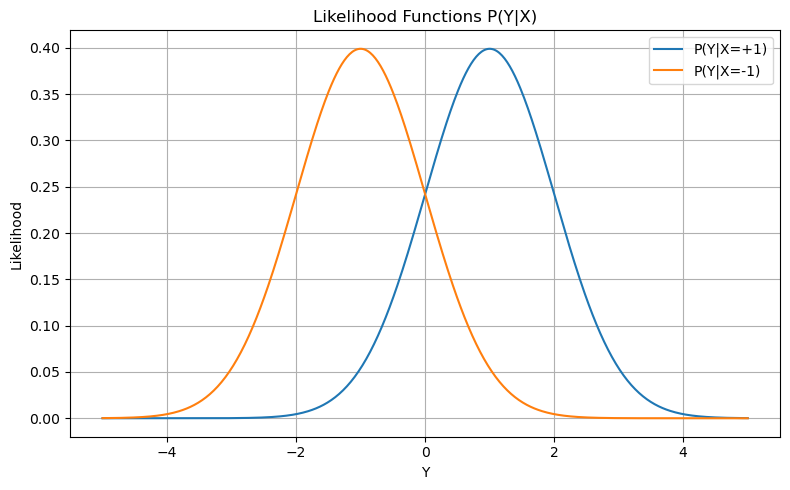

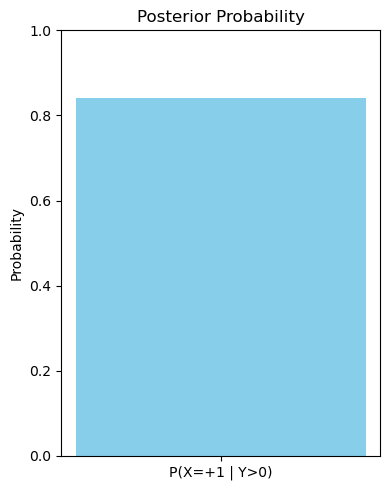

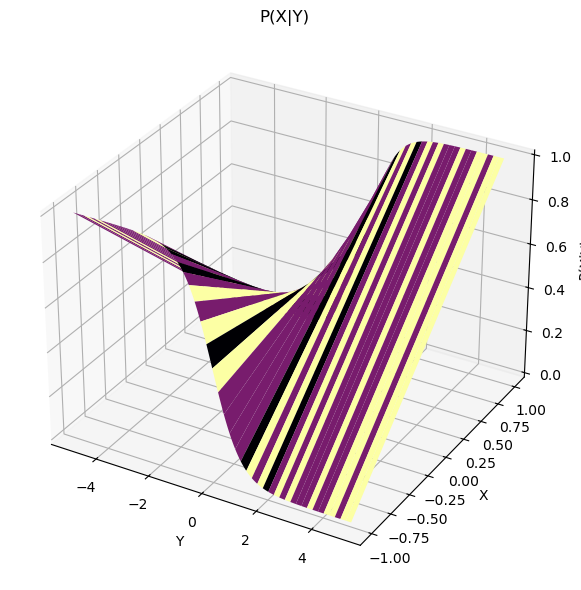

In [9]:

from matplotlib import cm


X_vals = np.array([1, -1])


Y_vals = np.linspace(-5, 5, 500)


def normal_pdf(y, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((y - mean) / std) ** 2)

# Likelihood P(Y|X)
likelihood = {
    1: normal_pdf(Y_vals, mean=1, std=1),
    -1: normal_pdf(Y_vals, mean=-1, std=1)
}


plt.figure(figsize=(8, 5))
plt.plot(Y_vals, likelihood[1], label='P(Y|X=+1)')
plt.plot(Y_vals, likelihood[-1], label='P(Y|X=-1)')
plt.title("Likelihood Functions P(Y|X)")
plt.xlabel("Y")
plt.ylabel("Likelihood")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


dy = Y_vals[1] - Y_vals[0]
P_Y_gt_0_given_X_pos = np.sum(likelihood[1][Y_vals > 0]) * dy
P_Y_gt_0_given_X_neg = np.sum(likelihood[-1][Y_vals > 0]) * dy
P_Y_gt_0 = 0.5 * (P_Y_gt_0_given_X_pos + P_Y_gt_0_given_X_neg)

posterior = P_Y_gt_0_given_X_pos * 0.5 / P_Y_gt_0


plt.figure(figsize=(4, 5))
plt.bar(['P(X=+1 | Y>0)'], [posterior], color='skyblue')
plt.ylim(0, 1)
plt.title("Posterior Probability")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()


Y_mesh, X_mesh = np.meshgrid(Y_vals, X_vals)
P_Y_given_X = normal_pdf(Y_mesh, X_mesh, 1)
P_X = 0.5  # Uniform prior
P_Y = 0.5 * (normal_pdf(Y_mesh, 1, 1) + normal_pdf(Y_mesh, -1, 1))
P_X_given_Y = P_Y_given_X * P_X / P_Y


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y_mesh, X_mesh, P_X_given_Y, cmap=cm.inferno)
ax.set_title("P(X|Y)")
ax.set_xlabel("Y")
ax.set_ylabel("X")
ax.set_zlabel("P(X|Y)")
plt.tight_layout()
plt.show()



# **5. Conditional expectation**

### **Question 1:**
You roll two fair 6-sided dice. Let S be the sum of the two dice, and let M be the maximum of the two dice.

- Theoretical Computation:

  Compute the unconditional expectation E[M], the expected maximum of two dice rolls.

  Compute the conditional expectation E[M∣S is even], the expected maximum given that the sum is even.

- Write a Python function simulate_dice_rolls(n) that:

  Simulates rolling two dice n times.

  Estimates both E[M] and E[M∣S is even].

  Compares the estimated values with the theoretical results.

  Run the function for 10,000 simulations and interpret the results.



In [10]:

def compute_theoretical_expectations():
    outcomes = [(i, j) for i in range(1, 7) for j in range(1, 7)]
    max_values = [max(i, j) for i, j in outcomes]
    sum_even_max_values = [max(i, j) for i, j in outcomes if (i + j) % 2 == 0]

    E_M = np.mean(max_values)
    E_M_given_even_S = np.mean(sum_even_max_values)

    return E_M, E_M_given_even_S

def simulate_dice_rolls(n):
    die1 = np.random.randint(1, 7, size=n)
    die2 = np.random.randint(1, 7, size=n)

    S = die1 + die2
    M = np.maximum(die1, die2)

    E_M_est = np.mean(M)
    E_M_given_even_S_est = np.mean(M[S % 2 == 0])

    E_M_theoretical, E_M_given_even_S_theoretical = compute_theoretical_expectations()


    print("E[M] (estimated)", E_M_est)
    print("E[M] (theoretical)", E_M_theoretical)
    print("E[M | S even] (estimated)", E_M_given_even_S_est)
    print("E[M | S even] (theoretical)", E_M_given_even_S_theoretical)


simulate_dice_rolls(10_000)


E[M] (estimated) 4.4688
E[M] (theoretical) 4.472222222222222
E[M | S even] (estimated) 4.373790322580645
E[M | S even] (theoretical) 4.388888888888889


# **6. Sum of two random variables**

### **Question 1:**
Write a Python program to simulate the sum of two independent discrete uniform random variables \( X \) and \( Y \), where both are uniformly distributed over \{0, 1, 2, 3\}.

- Generate **100,000** random samples of \( X \) and \( Y \).
- Compute \( Z = X + Y \) for each sample.
- Plot the empirical probability mass function (PMF) of \( Z \) using Matplotlib.
- Compare the simulated PMF with the theoretical PMF.


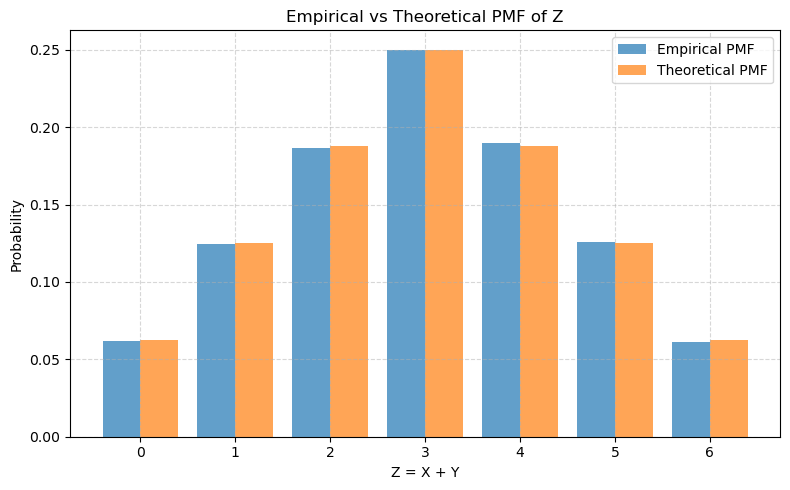

In [11]:

n_samples = 100000
X = np.random.randint(0, 4, n_samples)
Y = np.random.randint(0, 4, n_samples)
Z = X + Y


values, counts = np.unique(Z, return_counts=True)
empirical_pmf = counts / n_samples


theoretical_pmf = [0] * 7
for x in range(4):
    for y in range(4):
        theoretical_pmf[x + y] += 1
theoretical_pmf = [p / 16 for p in theoretical_pmf]


plt.figure(figsize=(8, 5))
plt.bar(values - 0.2, empirical_pmf, width=0.4, label="Empirical PMF", alpha=0.7)
plt.bar(np.arange(7) + 0.2, theoretical_pmf, width=0.4, label="Theoretical PMF", alpha=0.7)
plt.xticks(np.arange(7))
plt.xlabel("Z = X + Y")
plt.ylabel("Probability")
plt.title("Empirical vs Theoretical PMF of Z")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **7. Examples of sum of two random variables**

### **Question 1: Numerical Convolution of Exponential PDFs**

Let \(X\) and \(Y\) be independent random variables with PDFs:

\
f_X(x) =
\begin{cases}
x e^{-x}, & x \geq 0 \\
0, & \text{otherwise}
\end{cases}

f_Y(y) =
\begin{cases}
y e^{-y}, & y \geq 0 \\
0, & \text{otherwise}
\end{cases}


**Task**:  
1. Numerically compute the PDF of \(Z = X + Y\)
2. Compare your numerical result with the analytical solution:
   \[
   f_Z(z) =
   \begin{cases}
   \dfrac{z^3}{6} e^{-z}, & z \geq 0 \\
   0, & \text{otherwise}
   \end{cases}
   


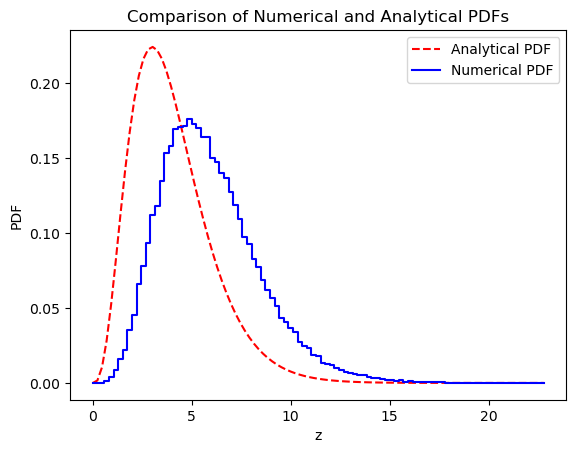

In [12]:
N = 100000

X_dist = torch.distributions.gamma.Gamma(concentration=3, rate=1)
Y_dist = torch.distributions.gamma.Gamma(concentration=3, rate=1)

X_samples = X_dist.sample((N,))
Y_samples = Y_dist.sample((N,))

Z_samples = X_samples + Y_samples

bins = torch.linspace(0, Z_samples.max().item(), 100)
hist, _ = torch.histogram(Z_samples, bins=bins, density=True)

z_values = bins[:-1]
f_Z_analytical = (z_values**3 / 6) * torch.exp(-z_values)

z_values_np = z_values.numpy()
f_Z_analytical_np = f_Z_analytical.numpy()
hist_np = hist.numpy()
bins_np = bins[:-1].numpy()

plt.plot(z_values_np, f_Z_analytical_np, label="Analytical PDF", color="red", linestyle="dashed")
plt.step(bins_np, hist_np, where='mid', label="Numerical PDF", color="blue")
plt.xlabel("z")
plt.ylabel("PDF")
plt.legend()
plt.title("Comparison of Numerical and Analytical PDFs")
plt.show()

### **Question 2: Simulate the sum of two Gaussian variables**
X
∼
N
(
1
,
2
)
 and
Y
∼
N
(
3
,
4
)
 and verify that
X
+
Y
∼
N
(
4
,
6
)


Estimated Mean of Z: 4.000423908233643
Estimated Variance of Z: 19.981107711791992


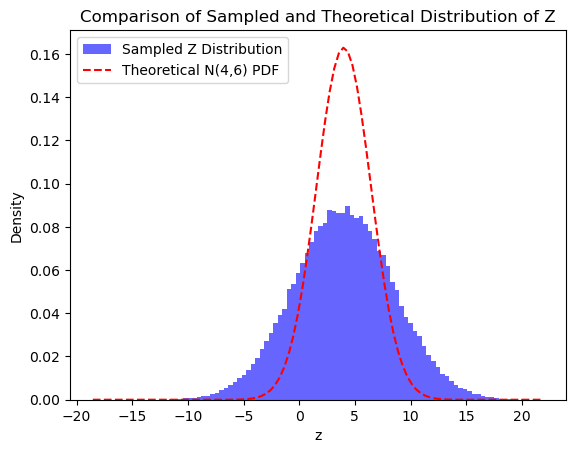

In [25]:
N = 100000

X_dist = torch.distributions.Normal(loc=1, scale=2)
Y_dist = torch.distributions.Normal(loc=3, scale=4)

X_samples = X_dist.sample((N,))
Y_samples = Y_dist.sample((N,))

Z_samples = X_samples + Y_samples

mean_Z = Z_samples.mean().item()
var_Z = Z_samples.var().item()

print(f"Estimated Mean of Z: {mean_Z}")
print(f"Estimated Variance of Z: {var_Z}")

def gaussian_pdf(z, mean, var):
    return (1 / torch.sqrt(2 * torch.pi * var)) * torch.exp(-((z - mean)**2) / (2 * var))



z_values = torch.linspace(Z_samples.min().item(), Z_samples.max().item(), 100)

f_Z_theoretical = gaussian_pdf(z_values, mean=4, var=torch.tensor(6))

plt.hist(Z_samples.numpy(), bins=100, density=True, alpha=0.6, color='blue', label="Sampled Z Distribution")

plt.plot(z_values.numpy(), f_Z_theoretical, label="Theoretical N(4,6) PDF", color="red", linestyle="dashed")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.title("Comparison of Sampled and Theoretical Distribution of Z")
plt.show()

# **8. Jensen's Inequality**

### **Question 1:**

Jensen’s inequality states that for a convex function $f(x)$ and a random variable $X$:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)]
$$

Task:

- Choose a convex function $f(x)$ (e.g. $f(x) = x^2$ or $f(x) = e^x$)
- Generate random samples of $X$ from a given probability distribution (e.g., Normal, Uniform, or Exponential).
- Compute both sides of Jensen’s inequality using Python.
- Compare the results and check if Jensen’s inequality holds.

What would happen if you now take a concave function? What did you observe?

How does the different between $f(\mathbb{E}[X])$ and $\mathbb{E}[f(X)]$ change for different distributions? Write down all your observations in markdown cell.



In [14]:
N = 100000

def f_square(x):
    return x**2

def f_exp(x):
    return torch.exp(x)

def f_log(x):
    return torch.log(x + 1e-5)

distributions = {
    "Normal": torch.distributions.Normal(loc=0, scale=1),
    "Uniform": torch.distributions.Uniform(0, 2),
    "Exponential": torch.distributions.Exponential(rate=1)
}

results = {}

for name, dist in distributions.items():

    X_samples = dist.sample((N,))
    
    E_X = X_samples.mean()
    E_f_square_X = f_square(X_samples).mean()
    E_f_exp_X = f_exp(X_samples).mean()
    E_f_log_X = f_log(X_samples).mean()
    
    f_square_E_X = f_square(E_X)
    f_exp_E_X = f_exp(E_X)
    f_log_E_X = f_log(E_X)
    
    results[name] = {
        "f(x) = x²": (f_square_E_X.item(), E_f_square_X.item()),
        "f(x) = e^x": (f_exp_E_X.item(), E_f_exp_X.item()),
        "f(x) = log(x)": (f_log_E_X.item(), E_f_log_X.item())
    }

for dist_name, values in results.items():
    print(f"Distribution: {dist_name}")
    for func_name, (lhs, rhs) in values.items():
        print(f"  {func_name}: f(E[X]) = {lhs:.4f}, E[f(X)] = {rhs:.4f}, Difference = {rhs - lhs:.4f}")
    print()

Distribution: Normal
  f(x) = x²: f(E[X]) = 0.0000, E[f(X)] = 0.9872, Difference = 0.9872
  f(x) = e^x: f(E[X]) = 1.0000, E[f(X)] = 1.6354, Difference = 0.6355
  f(x) = log(x): f(E[X]) = nan, E[f(X)] = nan, Difference = nan

Distribution: Uniform
  f(x) = x²: f(E[X]) = 0.9994, E[f(X)] = 1.3334, Difference = 0.3340
  f(x) = e^x: f(E[X]) = 2.7175, E[f(X)] = 3.1950, Difference = 0.4776
  f(x) = log(x): f(E[X]) = -0.0003, E[f(X)] = -0.3067, Difference = -0.3065

Distribution: Exponential
  f(x) = x²: f(E[X]) = 0.9968, E[f(X)] = 2.0013, Difference = 1.0045
  f(x) = e^x: f(E[X]) = 2.7139, E[f(X)] = 13.4998, Difference = 10.7859
  f(x) = log(x): f(E[X]) = -0.0016, E[f(X)] = -0.5808, Difference = -0.5792



# **Observations**

### **Convex functions**
For **f(x) = x²** and **f(x) = e^x**, we observe that **E[f(X)] is always greater than f(E[X])**, confirming Jensen’s inequality.
This difference varies depending on the shape of the probability distribution.

### **Concave function (log(x))**
For **f(x) = log(x)**, we observe that **E[f(X)] is smaller than f(E[X])**, showing the reverse behavior of Jensen’s inequality.
This indicates that for concave functions, the inequality flips direction.

### **Effect of Different Distributions**
#Normal Distribution:** Difference is moderate.
Uniform Distribution:** Difference is smaller since variance is lower.
Exponential Distribution:** Difference is larger since the distribution is more skewed.

### **Conclusion**
Jensen’s inequality holds for convex functions and reverses for concave functions. The difference is influenced by the distribution’s shape and variance.


# **9. Markov and Chebyshev inequality**

### **Question 1: Markov inequality**
Let $X$ be a non-negative random variable with an expected value $\mathbb{E}[X] = 10$. Markov’s inequality states that for any $a > 0$:

$$
P(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$

---

## **Tasks**
1. **Analytical Task:**  
   Use Markov’s inequality to find an upper bound on $P(X \geq 25)$.

2. **Coding Task:**  
   - Simulate 100,000 samples from an **Exponential distribution** with rate $\lambda = \frac{1}{10}$, which has an expected value of $\mathbb{E}[X] = 10$.  
   - Estimate $P(X \geq 25)$ empirically using the generated samples.  

3. **Comparison:**  
   - Compare the empirical probability with the Markov bound.  
   - Discuss whether the bound is tight.

---

## **Hints**
- The exponential distribution with rate $\lambda$ has mean $\frac{1}{\lambda}$.


Empirical P(X >= 25): 0.0831
Markov Bound P(X >= 25): 0.4000


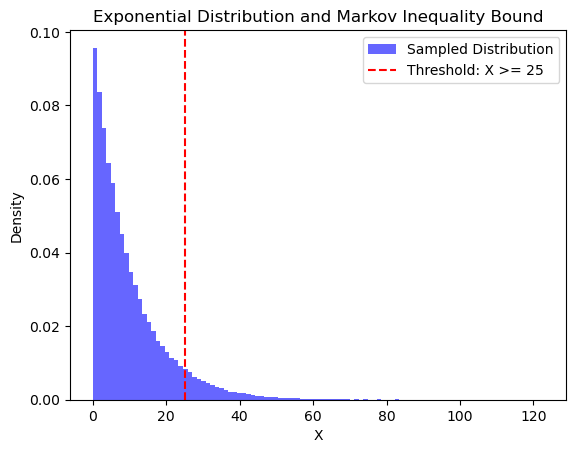

In [15]:
N = 100000

X_dist = torch.distributions.Exponential(rate=1/10)

X_samples = X_dist.sample((N,))

P_empirical = (X_samples >= 25).float().mean().item()

P_markov_bound = 10 / 25

print(f"Empirical P(X >= 25): {P_empirical:.4f}")
print(f"Markov Bound P(X >= 25): {P_markov_bound:.4f}")

plt.hist(X_samples.numpy(), bins=100, density=True, alpha=0.6, color="blue", label="Sampled Distribution")

z_values = torch.linspace(25, X_samples.max().item(), 100)
plt.axvline(x=25, color="red", linestyle="dashed", label="Threshold: X >= 25")

plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.title("Exponential Distribution and Markov Inequality Bound")
plt.show()

### **Question 2: Chebyshev’s Inequality**

For a set of i.i.d. random variables $X_1, X_2, \dots, X_N$ with mean $\mu = 5$ and variance $\sigma^2 = 4$, the sample mean is:

$$
\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

Chebyshev’s inequality states:

$$
P(|\bar{X} - \mu| \geq k) \leq \frac{\sigma^2}{N k^2}
$$

### **Tasks**

1. **Analytical Task:**
   - Use Chebyshev’s inequality to find an upper bound for $P(|\bar{X} - 5| \geq 1)$ for $N = 10$ and $N = 100$.

2. **Coding Task:**
   - Simulate 100,000 trials where you compute sample means for $N = 10$ and $N = 100$, assuming each $X_i \sim U[3, 7]$ (uniform distribution on the interval [3, 7]).
   - Estimate $P(|\bar{X} - 5| \geq 1)$ empirically from the simulations.

3. **Comparison and Discussion:**
    - Compare the simulated probabilities with the theoretical bounds. Discuss how the probability behaves as $ N \to \infty $, linking this to the **Weak Law of Large Numbers**.

N = 10
  Empirical P(|X̄ - 5| ≥ 1): 0.0048
  Chebyshev Bound: 0.4000

N = 100
  Empirical P(|X̄ - 5| ≥ 1): 0.0000
  Chebyshev Bound: 0.0400



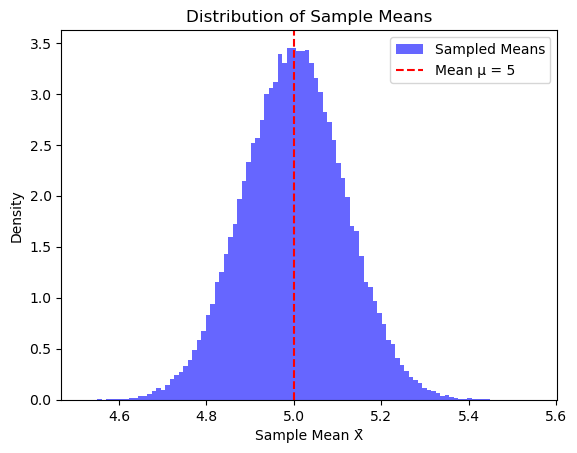

In [16]:
num_trials = 100000

N_values = [10, 100]

low, high = 3, 7

results = {}

for N in N_values:

    X_samples = torch.empty((num_trials, N)).uniform_(low, high)
    sample_means = X_samples.mean(dim=1)
    
    P_empirical = (torch.abs(sample_means - 5) >= 1).float().mean().item()
    
    P_chebyshev = 4 / (N * 1**2)
    
    results[N] = {"Empirical P": P_empirical, "Chebyshev Bound": P_chebyshev}

for N, values in results.items():
    print(f"N = {N}")
    print(f"  Empirical P(|X̄ - 5| ≥ 1): {values['Empirical P']:.4f}")
    print(f"  Chebyshev Bound: {values['Chebyshev Bound']:.4f}")
    print()
    
plt.hist(sample_means.numpy(), bins=100, density=True, alpha=0.6, color="blue", label="Sampled Means")
plt.axvline(x=5, color="red", linestyle="dashed", label="Mean μ = 5")
plt.xlabel("Sample Mean X̄")
plt.ylabel("Density")
plt.legend()
plt.title("Distribution of Sample Means")
plt.show()